## Latihan Penanganan Missing Value dg dataset Titanic


import library Python yang diperlukan untuk analisi data: Numpy dan Panda

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### Load data dan memahami data

Untuk secara detil analisis eksplorasi data secara singkat, dapat melihat ke Notebook titanic00_EDA


In [2]:
df = pd.read_csv('../dataset/titanic/train.csv')
dft = df.copy()


### Teknik 1. Penanganan _Missing value_ dengan **eliminasi**
Menghapus baris/record yang mengandung missing value

Berdasarkan hasil analisi data di sebelumnya, dapat diketahui bahwa: 
* field/kolom/atribut **PassengerId** karena hanya sebagai nomor urut atau unique variabel untuk setiap record, tidak kita perlukan. 
* field/kolom/atribut **Name** memiliki jumlah **unique** sebanyak jumlah record total, yaitu 891, sehingga tidak signifikan untuk pemodelan prediksi.
* field/kolom/atribut **Ticket** memiliki jumlah **unique** hampir sebanyak jumlah record total, yaitu 681 (85%), sehingga tidak signifikan untuk pemodelan prediksi.
* ada 3 field yang memiliki _missing value_ yaitu: age, cabin dan embarked. 
* field/kolom/atribut **Cabin** yang mengandung 77.1% record, maka kita tidak dapat menghapus record sebanyak itu. Sebaliknya kita dapat menghapus kolom/atribut tersebut.

Oleh karena itu kita perlu membuang ketiga atribut tersebut. 

Dalam hal ini, untuk kasus atribut **Cabin** yang memiliki nilai _missing value_, kita memilih teknik **eliminasi**.

In [3]:
dft.drop(["PassengerId","Cabin","Name","Ticket"], axis=1, inplace=True)
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
dft.describe(include = "all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [5]:
dft.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Sekali lagi, **Eliminasi** untuk record yang memiliki _missing value_
Berdasarkan data di atas, masih ada 2 atribut yang memiliki _missing value_ Age = 177 record dan Embarked = 2 record. 

Langkah berikut adalah menghapus record-record yang field Age atau Embarked memiliki _missing value_. 

In [6]:
dft.drop(["Age","Embarked"], axis=1, inplace=True)
dft.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


### Pemodelan dengan data dengan algoritma Decision Tree

#### Seleksi Fitur (_Feature Selection_)
Sebagaimana algoritma _supervised_ lainnya, kita perlu membagi atribut menjadi 2 bagian. Satu bagian terdiri dari 1 atribut, sebagai variabel _**target**_, dan sisanya adalah sebagai variabel _**independent**_. 

Dalam hal ini, atribute **Survived** adalah variabel target, dan sisanya adalah variabel independent. Kemudian, kita membagi data menjadi data training (learning) dan data testing. Kali ini kita memilih cara pembagian data yang sederhana yaitu data testing adalah 30% dari total dataset.

Selanjutnya, untuk pemodelan dengan algoritma Decision Tree, jenis data harus numerik. Sedangkan kondisi dataset sekarang masih ada beberapa yang non-numerik,  yaitu Sex:male,female. Oleh karena itu atribute Sex harus ditransformasi menjadi nilai numerik. Dengan menggunakan tool LabelEncoder dari sklearn.preprocessing, kita dapat merubah secara otomatis atribute Sex menjadi male = 1, dan female = 0. 


In [8]:
le = LabelEncoder()
dft['Sex'] =  le.fit_transform(dft['Sex'])

In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [10]:
#split dataset in features and target variable
feature_cols = ['Pclass','Sex','SibSp','Parch','Fare']
X = dft[feature_cols] # Features
y = dft.Survived # Target variable

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### Training: membangun model prediksi dengan Decision Tree

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluasi akurasi dari model yang dihasilkan: 


In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7649253731343284


#### Visualisasi model dengan data


In [15]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [16]:
text_representation = tree.export_text(clf,
                                      feature_names=feature_cols)
print(text_representation)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Fare <= 28.23
|   |   |   |   |--- Fare <= 12.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  12.82
|   |   |   |   |   |--- Fare <= 13.25
|   |   |   |   |   |   |--- Parch <= 1.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Parch >  1.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  13.25
|   |   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |   |--- Fare <= 26.12
|   |   |   |   |   |   |   |   |--- Fare <= 25.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Fare >  25.00
|   |   |   |   |   |   |   |   |   |--- Parch <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Parch >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   

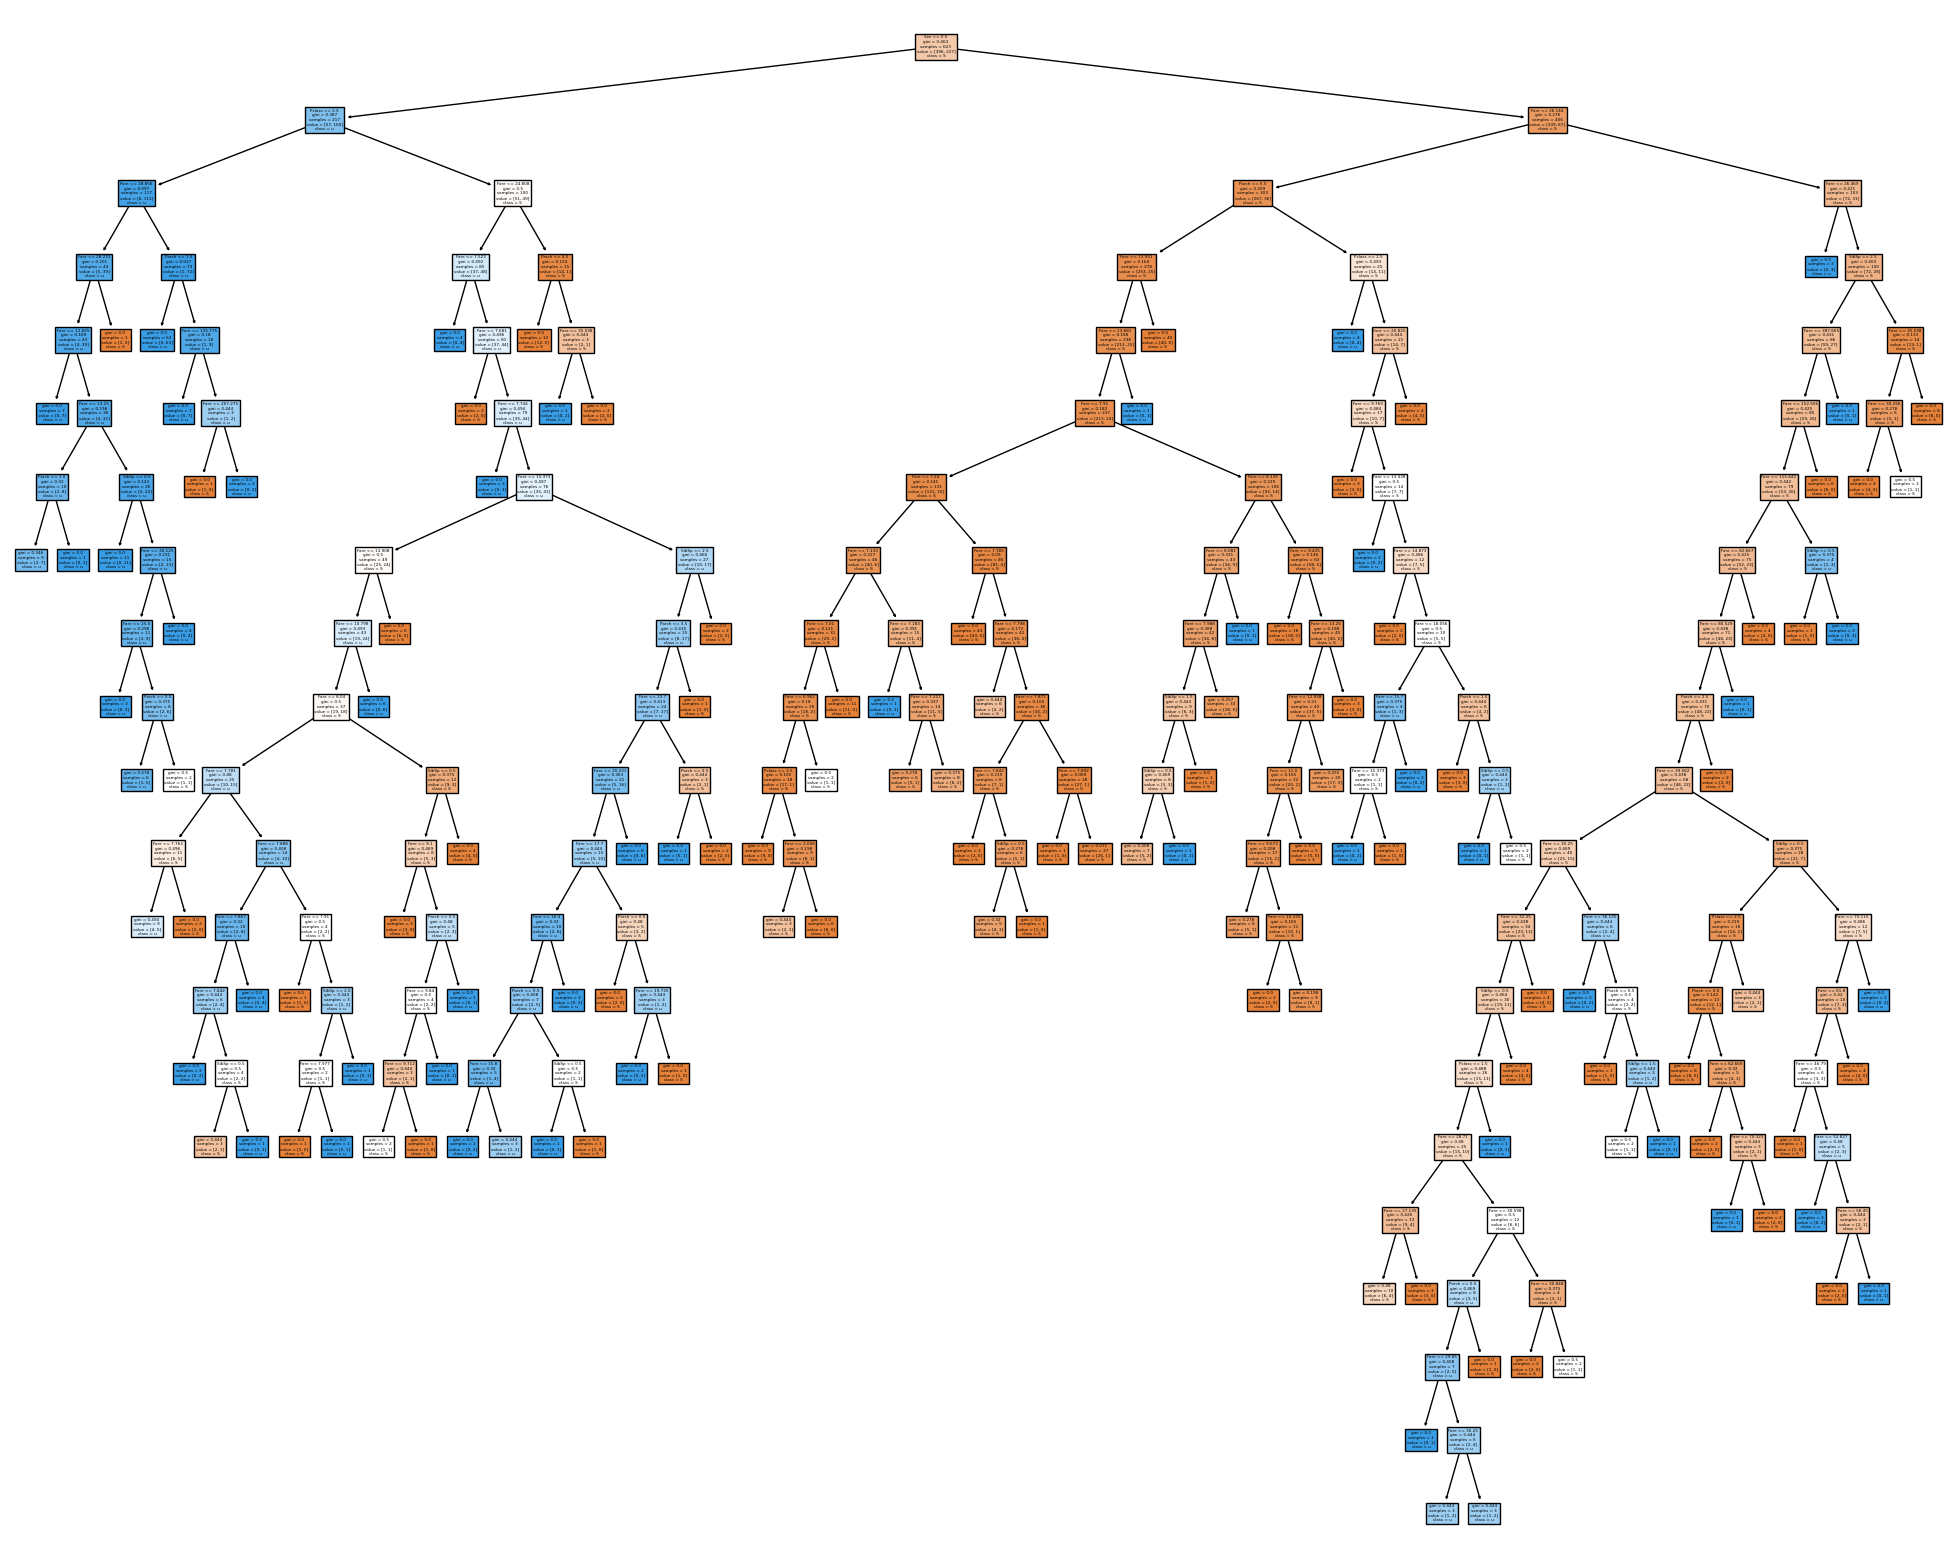

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names="Survived",
                   filled=True)

#### Pruning the visual tree
koreksi parameter algoritma


In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7723880597014925


In [21]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_4 <= 28.86
|   |   |   |--- class: 1
|   |   |--- feature_4 >  28.86
|   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_4 <= 24.81
|   |   |   |--- class: 1
|   |   |--- feature_4 >  24.81
|   |   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- feature_4 <= 26.14
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  26.14
|   |   |--- feature_4 <= 26.47
|   |   |   |--- class: 1
|   |   |--- feature_4 >  26.47
|   |   |   |--- class: 0



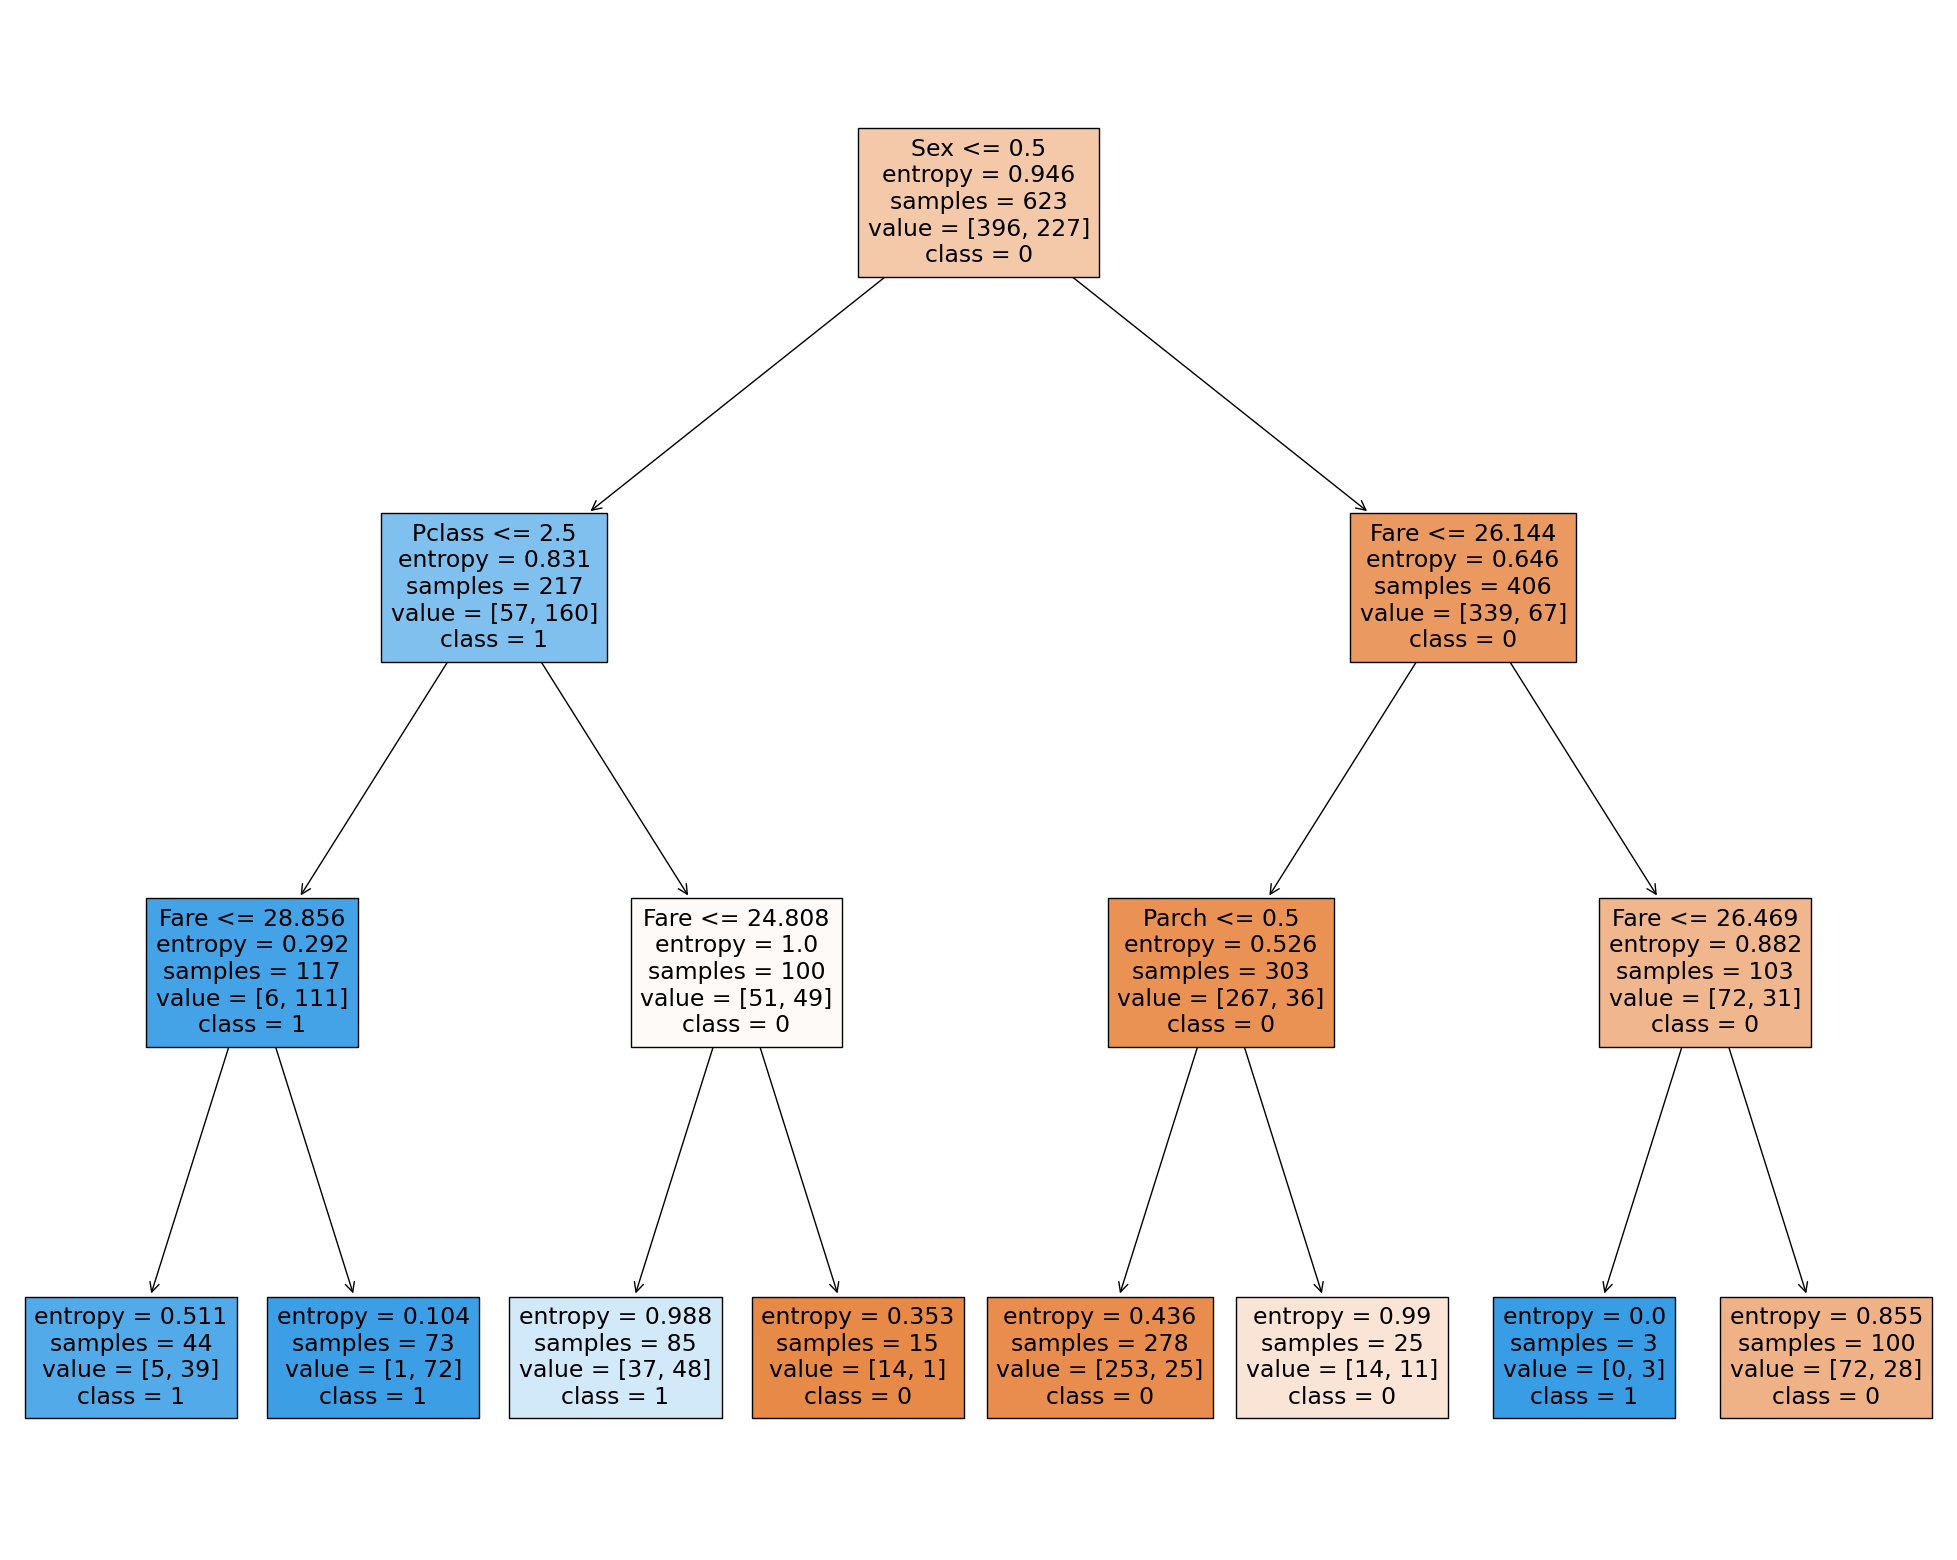

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=["0","1"],
                   filled=True)

In [22]:
fig.savefig("titanic01.png")

In [25]:
dft

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,1,3,0,0,0,7.9250
3,1,1,0,1,0,53.1000
4,0,3,1,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000
887,1,1,0,0,0,30.0000
888,0,3,0,1,2,23.4500
889,1,1,1,0,0,30.0000
